In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [2]:
def get_header(LT,exp='plus'):
    with open(f'/work/FAC/FGSE/IDYST/tbeucler/default/milton/repos/causal/shap_values/{LT}/{exp}_shap_values_{LT}.pkl','rb') as f:
        obj = pickle.load(f)
    return obj['headers'][1:]
header_plus = get_header(4,'plus')
header_ships = get_header(4,'ships')

# Box plot

In [3]:
def proc_shap(LT=None,header=None):
    with open(f'/work/FAC/FGSE/IDYST/tbeucler/default/saranya/causal/ships_plus_new/shap_results/plus_shap_values_{LT}_overall.pkl','rb') as f:
        SHAPS_PLUS = pickle.load(f)
    var_name = header#SHAPS_PLUS['headers'][1:]
    shap_values = SHAPS_PLUS['explanation'].values[:,:,0]
    max_abs_shap = {varname: np.abs(shap_values[:,i]).max() for i,varname in enumerate(var_name)}
    ranked_max_abs_shap = pd.Series(max_abs_shap).sort_values(ascending=False)
    rank_r000 = ranked_max_abs_shap.index.get_loc('R000')+1
    rank_r001 = ranked_max_abs_shap.index.get_loc('R001')+1
    rank_shl0 = ranked_max_abs_shap.index.get_loc('SHL0')+1
    return ranked_max_abs_shap,rank_r000,rank_r001,rank_shl0

def proc_shap_orig(LT=None,header=None):
    with open(f'/work/FAC/FGSE/IDYST/tbeucler/default/saranya/causal/ships_plus_new/shap_results/ships_shap_values_{LT}_overall.pkl','rb') as f:
        SHAPS_orig = pickle.load(f)
    var_name = header
    shap_values = SHAPS_orig['shap_values'][:,:,0]
    max_abs_shap = {varname: np.abs(shap_values[:,i]).max() for i,varname in enumerate(var_name)}
    ranked_max_abs_shap = pd.Series(max_abs_shap).sort_values(ascending=False)
    return ranked_max_abs_shap

In [4]:
def proc_shap_mlr(LT=None):
    with open(f'/work/FAC/FGSE/IDYST/tbeucler/default/saranya/causal/ships_plus_new/shap_results/plus_shap_values_{LT}_overall_mlr.pkl','rb') as f:
        SHAPS_orig = pickle.load(f)
    var_name = SHAPS_orig['header']
    shap_values = SHAPS_orig['explanation'].values[:,:]
    max_abs_shap = {varname: np.abs(shap_values[:,i]).max() for i,varname in enumerate(var_name)}
    ranked_max_abs_shap = pd.Series(max_abs_shap).sort_values(ascending=False)
    return ranked_max_abs_shap

In [5]:
ranked_max_abs_shap,_,_,_ = proc_shap(4,header_plus)
#ranked_max_abs_shap_orig = proc_shap_orig(4,header_ships)
ranked_max_abs_shap_mlr = proc_shap_mlr(4)

In [6]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Nimbus Roman','Times','C059-Roman','P052-Roman','DejaVu Serif']
plt.rcParams['mathtext.fontset'] = 'stix'

Original SHIPS MLP

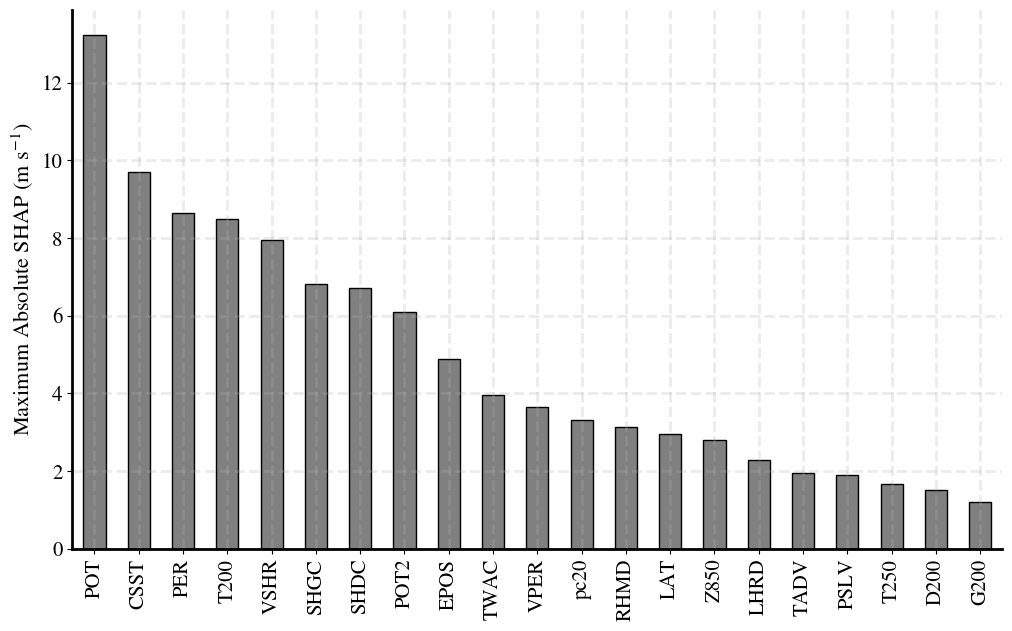

In [13]:
fig,ax = plt.subplots(1,1,figsize=(12,7))
bar_colors = ['gray' for var in ranked_max_abs_shap_orig.index]
bar_edges = ['black' for var in ranked_max_abs_shap_orig.index]
ranked_max_abs_shap_orig.plot.bar(ax=ax,color=bar_colors,edgecolor=bar_edges)

plt.grid(alpha=0.25,lw=2,ls='--')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Maximum Absolute SHAP (m s$^{-1}$)',fontsize=16)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
plt.savefig('./figures/SHAPS_panel1_4_orig.png',dpi=600)
plt.show()

Original SHIPS MLR

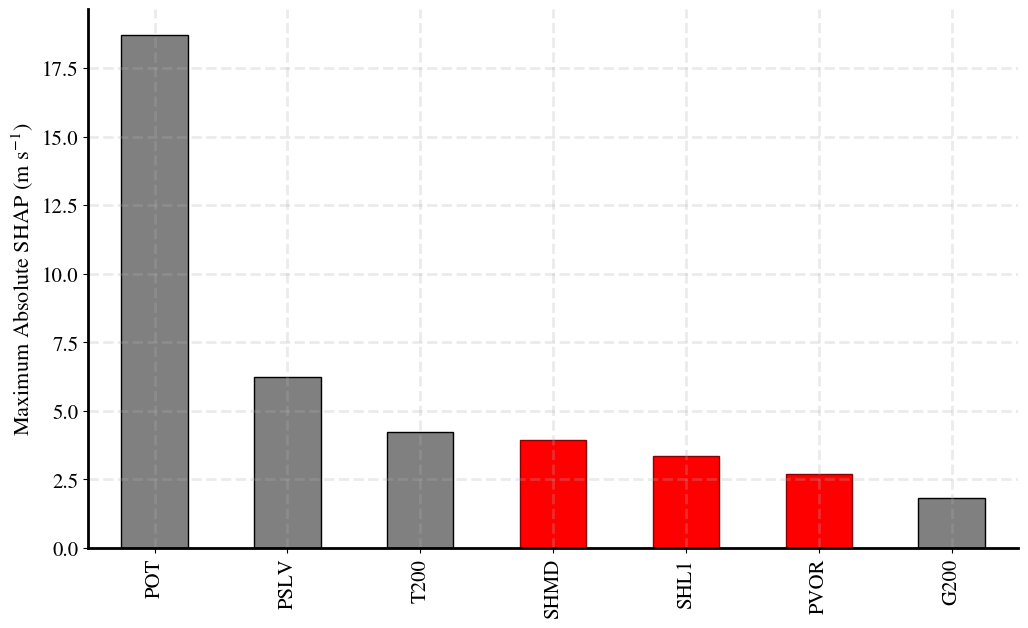

In [13]:
fig,ax = plt.subplots(1,1,figsize=(12,7))
highlight_var = ['SHL0','R000','SHMD','R001','SHL1','PVOR']
bar_colors = ['red' if var in highlight_var else 'gray' for var in ranked_max_abs_shap_mlr.index]
bar_edges = ['darkred' if var in highlight_var else 'black' for var in ranked_max_abs_shap_mlr.index]
ranked_max_abs_shap_mlr.plot.bar(ax=ax,color=bar_colors,edgecolor=bar_edges)

plt.grid(alpha=0.25,lw=2,ls='--')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Maximum Absolute SHAP (m s$^{-1}$)',fontsize=16)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
plt.savefig('./figures/SHAPS_panel1_4_mlr.png',dpi=600)
plt.show()

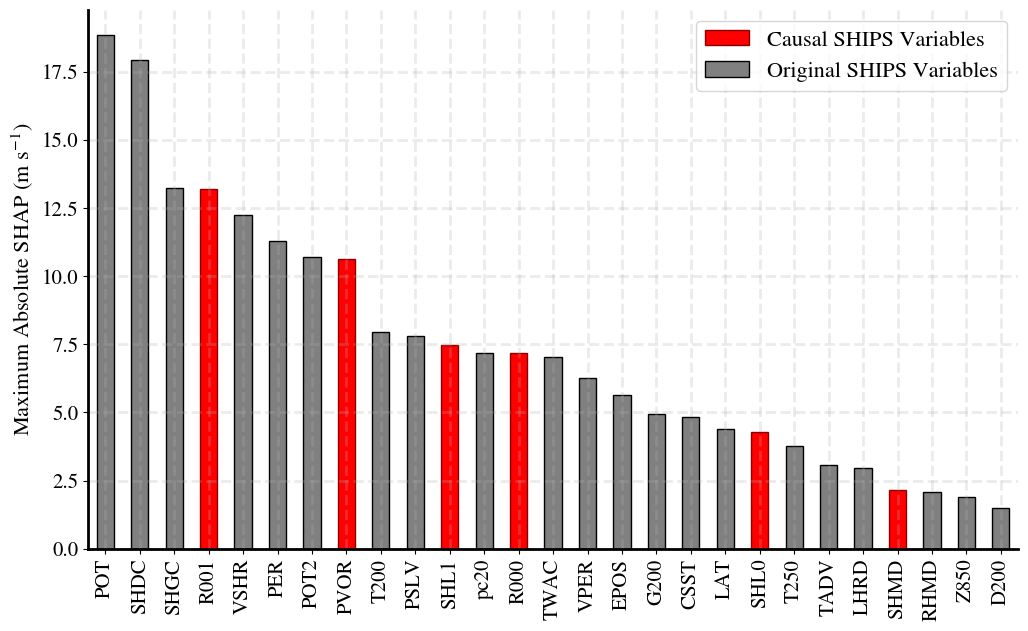

In [14]:
fig,ax = plt.subplots(1,1,figsize=(12,7))

highlight_var = ['SHL0','R000','SHMD','R001','SHL1','PVOR']
bar_colors = ['red' if var in highlight_var else 'gray' for var in ranked_max_abs_shap.index]
bar_edges = ['darkred' if var in highlight_var else 'black' for var in ranked_max_abs_shap.index]
ranked_max_abs_shap.plot.bar(ax=ax,color=bar_colors,edgecolor=bar_edges)

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red',edgecolor='darkred',label='Causal SHIPS Variables'),
    Patch(facecolor='gray',edgecolor='black',label='Original SHIPS Variables')
]
ax.legend(handles=legend_elements,loc=1,fontsize=16)

plt.grid(alpha=0.25,lw=2,ls='--')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Maximum Absolute SHAP (m s$^{-1}$)',fontsize=16)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
plt.savefig('./figures/SHAPS_panel1_4.png',dpi=600)
plt.show()

# Rank plot

In [74]:
R000_rank,R001_rank,SHL0_rank = [],[],[]
for i in [4,8,12,16,20]:
    _,a,b,c = proc_shap(i)
    R000_rank.append(a)
    R001_rank.append(b)
    SHL0_rank.append(c)

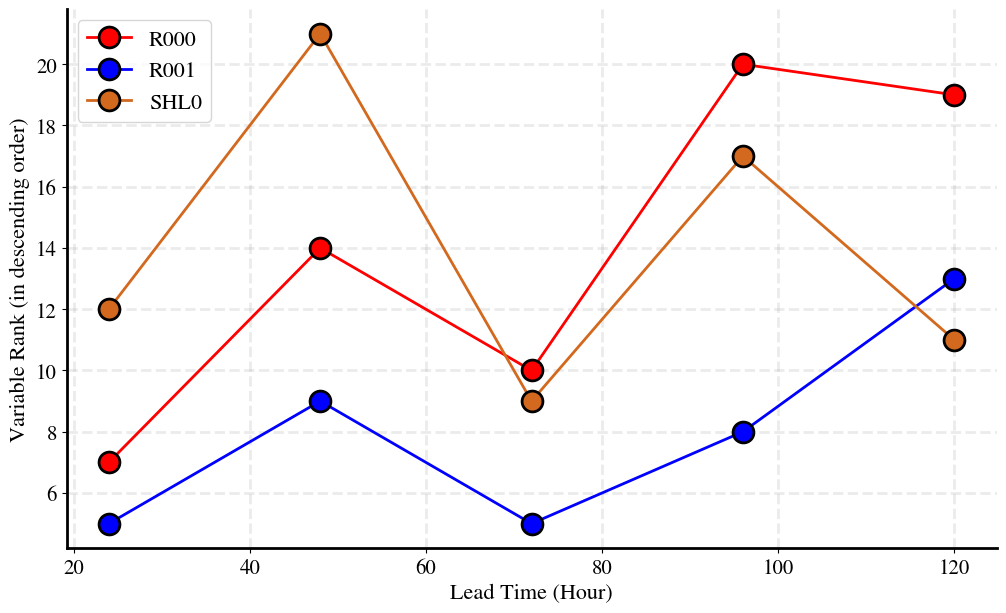

In [75]:
fig,ax = plt.subplots(1,1,figsize=(12,7))

plt.plot(np.asarray([4,8,12,16,20])*6,R000_rank,lw=2,c='r',marker='o',mec='k',mew=2,markersize=15,mfc='r',label='R000')
plt.plot(np.asarray([4,8,12,16,20])*6,R001_rank,lw=2,c='b',marker='o',mec='k',mew=2,markersize=15,mfc='b',label='R001')
plt.plot(np.asarray([4,8,12,16,20])*6,SHL0_rank,lw=2,c='chocolate',marker='o',mec='k',mew=2,markersize=15,mfc='chocolate',label='SHL0')
ax.legend(loc=2,fontsize=16)

plt.grid(alpha=0.25,lw=2,ls='--')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Variable Rank (in descending order)',fontsize=16)
plt.xlabel('Lead Time (Hour)',fontsize=16)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
plt.savefig('./figures/SHAPS_panel2.png',dpi=600)
plt.show()